In [1]:
#KNN
#https://khalil-o.medium.com/machine-learning-iris-data-set-k-nearest-neighbor-knn-db3382736933#:~:text=K%2DNearest%20Neighbor%20(KNN)%20on%20Iris%20Dataset&text=This%20makes%20the%20Iris%20dataset,Sepal%20length%2C%20Sepal%20width).

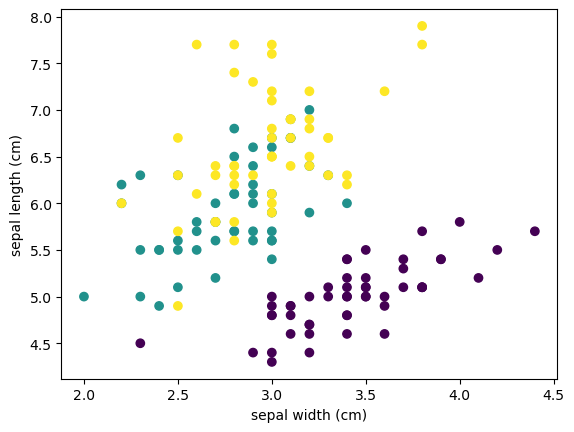

In [3]:
# Importing the dataset
from sklearn.datasets import load_iris
irisDataSet = load_iris()
X = irisDataSet.data
y = irisDataSet.target

# Plotting
import matplotlib.pyplot as plt
# 
features = irisDataSet.data.T
sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
petal_width = features[3]
# Setting labels for the plot figure
sepal_length_label = irisDataSet.feature_names[0] 
sepal_width_label = irisDataSet.feature_names[1]
petal_length_label = irisDataSet.feature_names[2]
petal_width_label = irisDataSet.feature_names[3]
plt.scatter(sepal_width, sepal_length, c=irisDataSet.target) #Plotting sepal width and length
plt.xlabel(sepal_width_label)
plt.ylabel(sepal_length_label)
plt.show() #Prints our plot

In [6]:
# Split the data set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(irisDataSet['data'], irisDataSet['target'], random_state=0)

from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors=1)
KNN_Classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
import numpy as np
# New iris with below information
X_newIris = np.array([[5.0, 2.9, 1.0, 0.2]])
predictNew = KNN_Classifier.predict(X_newIris)
print(predictNew)


[0]


C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [10]:
# Importing the dataset
from sklearn.datasets import load_iris
irisDataSet = load_iris()
X = irisDataSet.data
y = irisDataSet.target

# Split the data set into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(irisDataSet['data'], irisDataSet['target'], random_state=0)

from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors=1)
KNN_Classifier.fit(X_train, y_train)

# Score:
print(KNN_Classifier.score(X_test, y_test))


0.9736842105263158


C:\Users\FAHAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [1]:
#naive bayes
#https://www.kaggle.com/code/vinayshaw/iris-species-100-accuracy-using-naive-bayes

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
iris=pd.read_csv('Iris.csv')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [13]:
iris.columns = iris.columns.str.strip()

In [14]:
iris.drop(columns="Id", inplace=True)


KeyError: "['Id'] not found in axis"

In [15]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [18]:
!pip install missingno


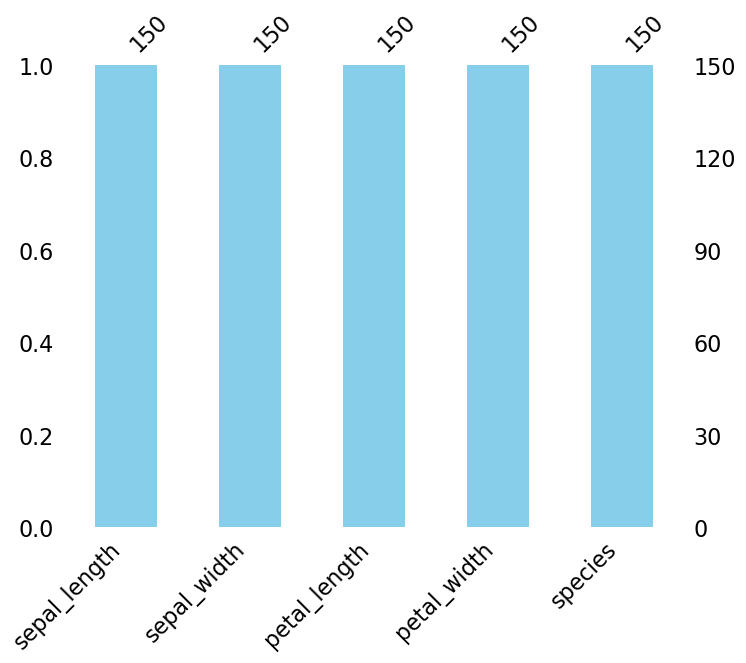

In [19]:
import missingno as msno
msno.bar(iris, figsize=(8, 6), color='skyblue')
plt.show()


In [21]:
pip install seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [22]:
iris.columns = iris.columns.str.strip()


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


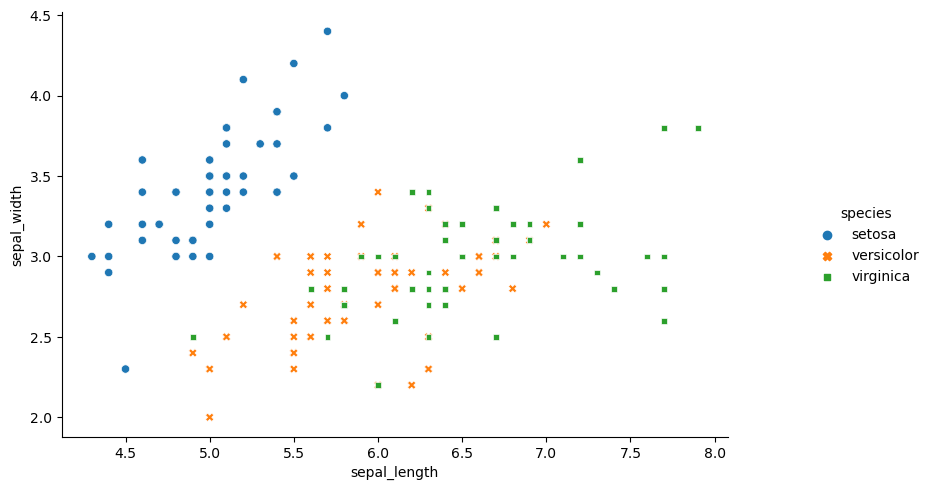

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the column names in your DataFrame
print(iris.columns)

# Create the plot
g = sns.relplot(x='sepal_length', y='sepal_width', data=iris, hue='species', style='species')
g.fig.set_size_inches(10, 5)
plt.show()


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


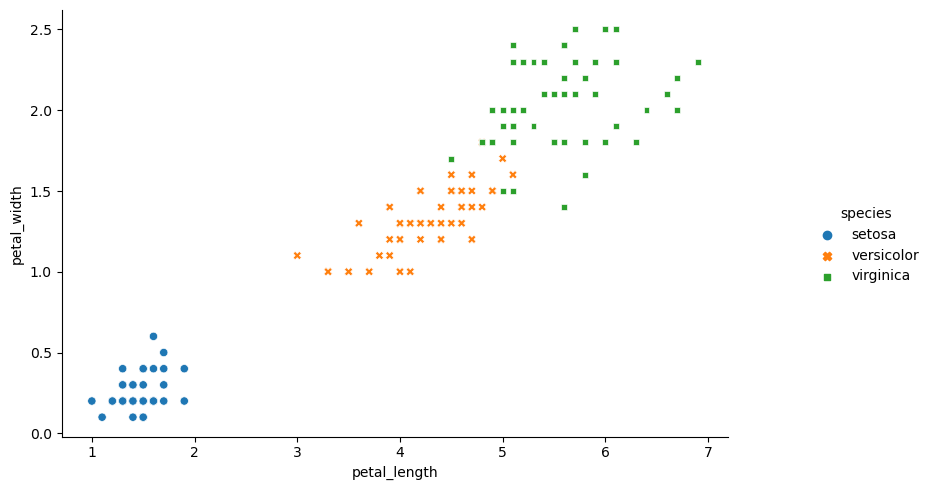

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the column names in your DataFrame
print(iris.columns)

# Create the plot
g = sns.relplot(x='petal_length', y='petal_width', data=iris, hue='species', style='species')
g.fig.set_size_inches(10, 5)
plt.show()


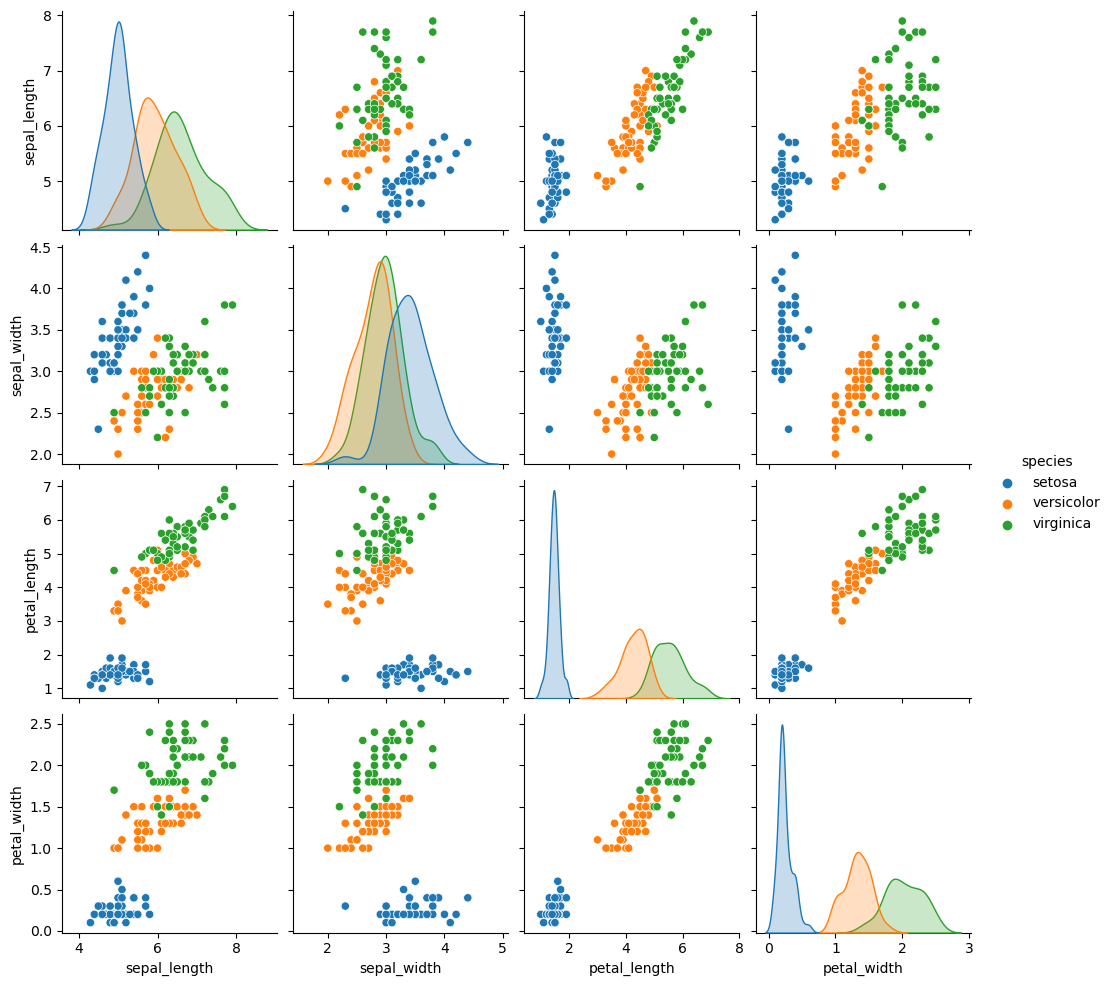

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'iris' is your DataFrame
sns.pairplot(iris, hue="species")  # Note the lowercase 's' in 'species'
plt.show()


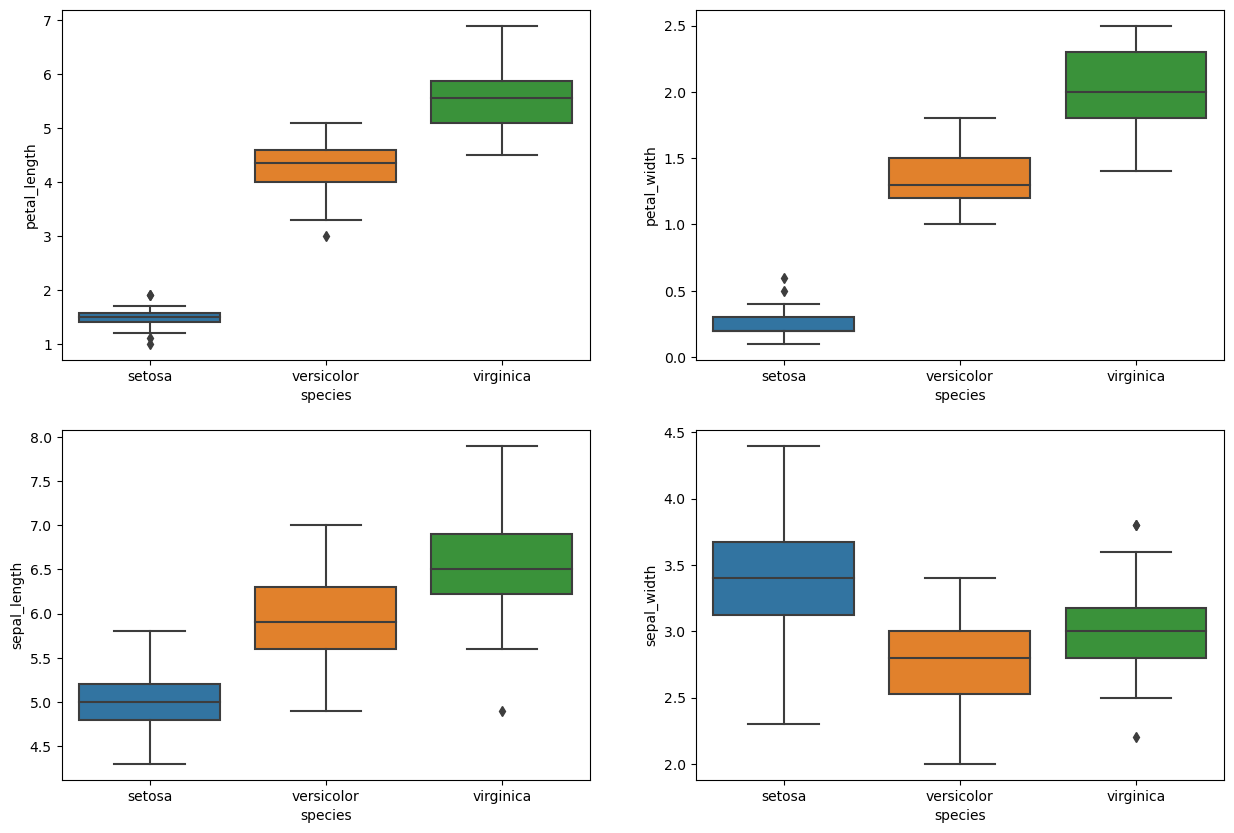

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'iris' is your DataFrame
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='species', y='petal_length', data=iris)  # Use 'species' and 'petal_length'
plt.subplot(2,2,2)
sns.boxplot(x='species', y='petal_width', data=iris)   # Use 'species' and 'petal_width'
plt.subplot(2,2,3)
sns.boxplot(x='species', y='sepal_length', data=iris)  # Use 'species' and 'sepal_length'
plt.subplot(2,2,4)
sns.boxplot(x='species', y='sepal_width', data=iris)   # Use 'species' and 'sepal_width'

plt.show()


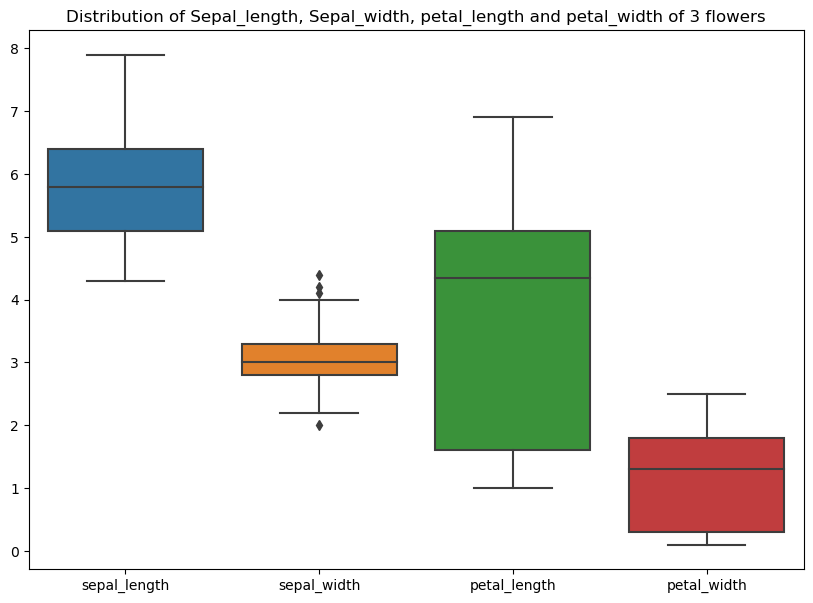

In [38]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

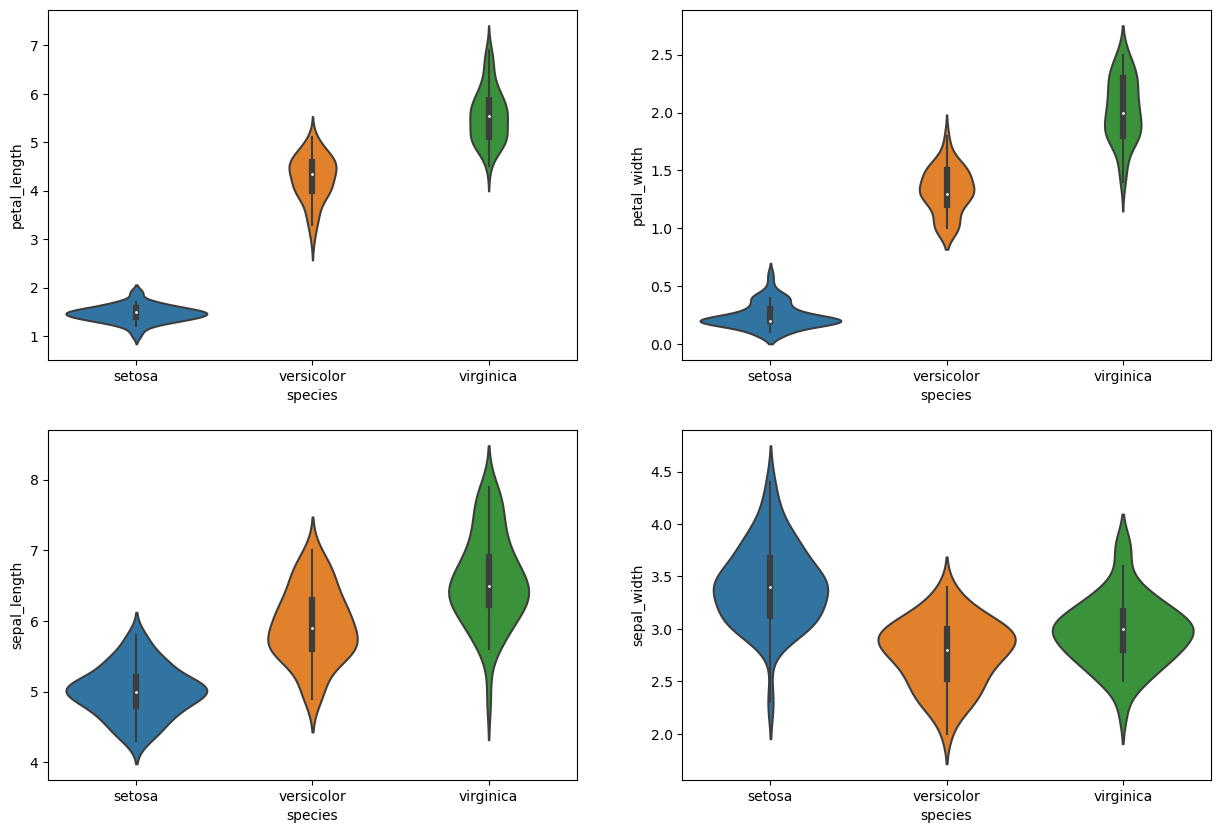

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'iris' is your DataFrame
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='petal_length', data=iris)  # Use 'species' and 'petal_length'
plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='petal_width', data=iris)   # Use 'species' and 'petal_width'
plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='sepal_length', data=iris)  # Use 'species' and 'sepal_length'
plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='sepal_width', data=iris)   # Use 'species' and 'sepal_width'

plt.show()


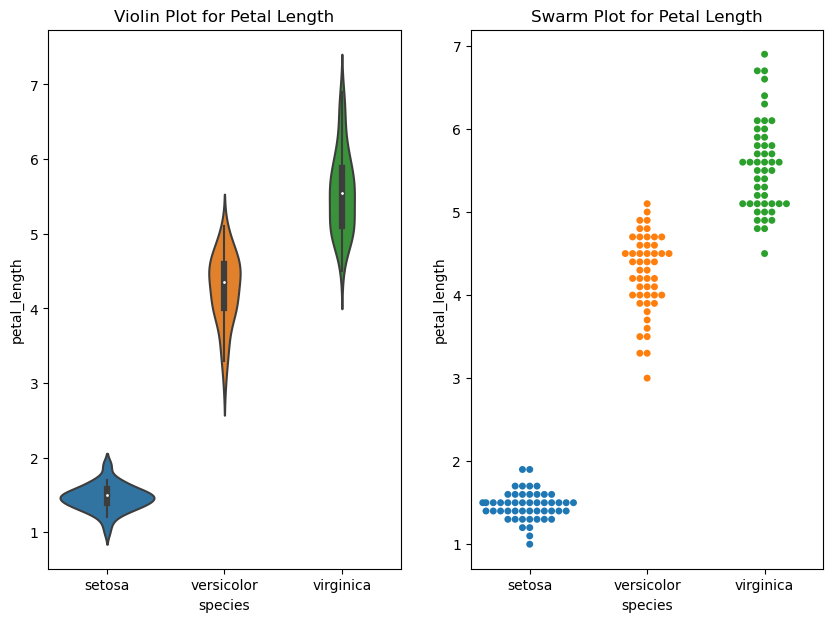

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 7))

# Violin plot for 'petal_length'
plt.subplot(1, 2, 1)
sns.violinplot(x='species', y='petal_length', data=iris)
plt.title('Violin Plot for Petal Length')

# Swarm plot for 'petal_length'
plt.subplot(1, 2, 2)
sns.swarmplot(x='species', y='petal_length', data=iris)
plt.title('Swarm Plot for Petal Length')

plt.show()


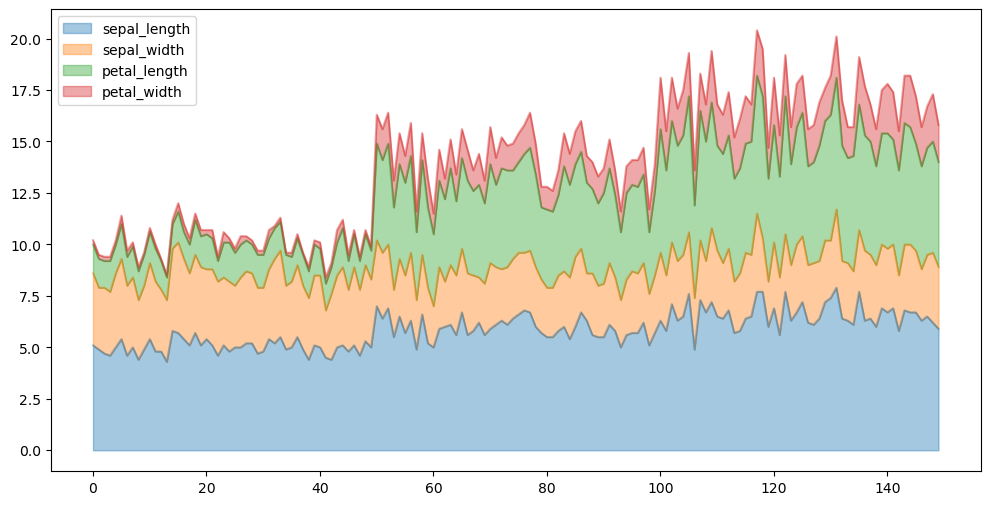

In [45]:
import pandas as pd

# Assuming 'iris' is your DataFrame
# Assuming 'iris' is your DataFrame
iris.plot.area(y=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], alpha=0.4, figsize=(12, 6))
plt.show()



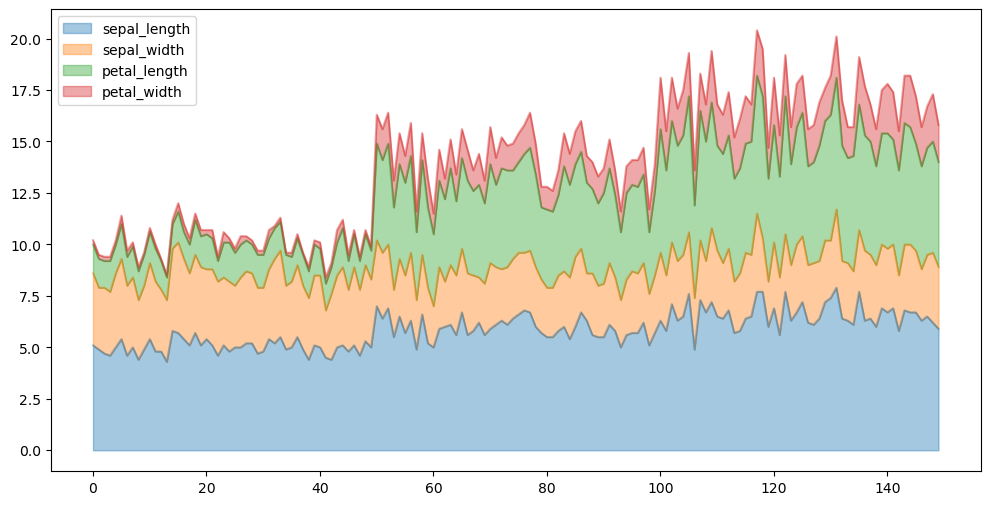

In [46]:
# Assuming 'iris' is your DataFrame
iris.plot.area(alpha=0.4, figsize=(12, 6))
plt.show()


In [47]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


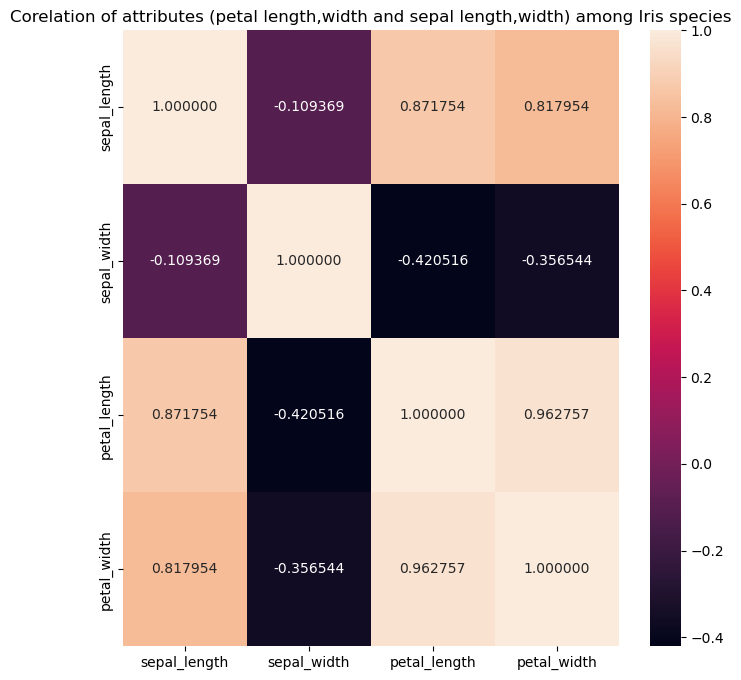

In [48]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()